# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [98]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [99]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [100]:
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

airb = bookReviewDataSet_filename
df = pd.read_csv(airb)
df.rename(columns={'Review': 'Book Review'}, inplace=True)
df.rename(columns={'Positive Review': 'Is the review classified as Positive?'}, inplace=True)

df.head()

,Book Review,Is the review classified as Positive?
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [101]:
import os
import pandas as pd
import re
import string

# addressing missingness, such as replacing missing values with means--
# renaming features and labels
# finding and replacing outliers--
# performing winsorization if needed--
# performing one-hot encoding on categorical features
# performing vectorization for an NLP problem
# addressing class imbalance in your data sample to promote fair AI-- AUC-ROC


# clean text w/o nltk... nltk won't implement???
def clean_text(text):
    text = text.lower()
    # remove punctuation/ numbers
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    words = text.split()
# remove stopwords (googled small list of nltk stopwords)
    stopwords = set(['i'
'me'
'my'
'myself'
'we'
'our'
'ours'
'ourselves'
'you'
'your'
'yours'
'yourself'
'yourselves'
'he'
'him'
'his'
'himself'
'she'
'her'
'hers'
'herself'
'it'
'its'
'itself'
'they'
'them'
'their'
'theirs'
'themselves'
'what'
'which'
'who'
'whom'
'this'
'that'
'these'
'those'
'am'
'is'
'are'
'was'
'were'
'be'
'been'
'being'
'have'
'has'
'had'
'having'
'do'
'does'
'did'
'doing'
'a'
'an'
'the'
'and'
'but'
'if'
'or'
'because'
'as'
'until' 
'while'
'of'
'at'
'by'
'for'
'with'
'about'])
    filtered_words = [word for word in words if word not in stopwords]
    clean = ' '.join(filtered_words)
    return clean

# put clean to the 'Review' column
df['Cleaned Review'] = df['Book Review'].apply(clean_text)

# print some clean reviews for comparison
print(df[['Book Review', 'Cleaned Review']].head())
# ---------------------------------------------------------------------

# part 1 of Lab 8 below
# YOUR CODE HERE
# Using tf-idf since I worked with it in my recent spring quarter with documents/ querying and wanted a refresh on this content!
df.shape

y = df["Is the review classified as Positive?"]
X = df["Book Review"]
X.head()
X.shape
test_size = 0.20
random_seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

# tfidf obj
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)





                                         Book Review  \
0  This was perhaps the best of Johannes Steinhof...   
1  This very fascinating book is a story written ...   
2  The four tales in this collection are beautifu...   
3  The book contained more profanity than I expec...   
4  We have now entered a second time of deep conc...   

                                      Cleaned Review  
0  this was perhaps the best of johannes steinhof...  
1  this very fascinating book is a story written ...  
2  the four tales in this collection are beautifu...  
3  the book contained more profanity than i expec...  
4  we have now entered a second time of deep conc...  


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

AUC on the test data: 0.6557
The size of the feature space: 10

Document Frequency Value: 1
AUC on the test data: 0.9310
The size of the feature space: 143560

Document Frequency Value: 10
AUC on the test data: 0.9254
The size of the feature space: 4257

Document Frequency Value: 100
AUC on the test data: 0.8625
The size of the feature space: 279

Document Frequency Value: 1000
AUC on the test data: 0.6557
The size of the feature space: 10
AUC on the test data: 0.9254


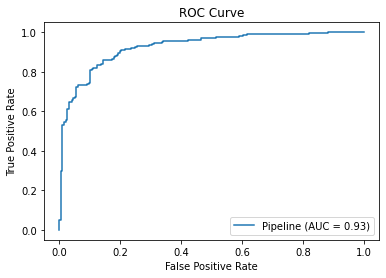

Best AUC on the test data: 0.9386


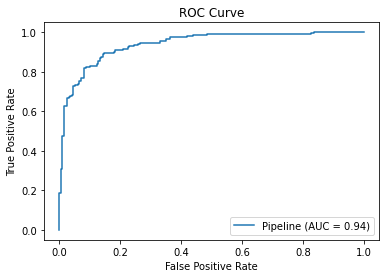


Document Frequency Value: 1000
FINAL: Best AUC on the test data: 0.9386
AUC on the test data: 0.6557
The size of the feature space: 10


In [103]:


model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)
probability_predictions = model.predict_proba(X_test_tfidf)[:, 1]
auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

len_feature_space = len(tfidf_vectorizer.vocabulary_)
print('The size of the feature space: {0}'.format(len_feature_space))


for min_df in [1, 10, 100, 1000]:
    
    print('\nDocument Frequency Value: {0}'.format(min_df))

    # obj
    
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=min_df)

    tfidf_vectorizer.fit(X_train)

    # transform data
    X_train_tfidf = tfidf_vectorizer.transform(X_train)  
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    model = LogisticRegression(max_iter=200)   
    
    model.fit(X_train_tfidf, y_train)

    # predict prob
    probability_predictions = model.predict_proba(X_test_tfidf)[:, 1]    
    auc = roc_auc_score(y_test, probability_predictions)
    print('AUC on the test data: {:.4f}'.format(auc))
    len_feature_space = len(tfidf_vectorizer.vocabulary_)

    print('The size of the feature space: {0}'.format(len_feature_space))

v = [
        ("vectorizer", TfidfVectorizer(ngram_range=(1,2), min_df=10)),
        ("model", LogisticRegression(max_iter=200))
    ]
model_pipeline = Pipeline(steps=v) 
# fit to data
model_pipeline.fit(X_train, y_train)
probability_predictions = model_pipeline.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, probability_predictions)# YOUR CODE HERE

print('AUC on the test data: {:.4f}'.format(auc_score))
plot_roc_curve(model_pipeline, X_test, y_test)
plt.title('ROC Curve')
plt.show()
# NOTE: AUC was higher with lower document frequency values


# PARAM GRID SEARCH CV

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt

v = [
    ("vectorizer", TfidfVectorizer(ngram_range=(1, 2))),
    ("model", LogisticRegression(max_iter=200))
]
model_pipeline = Pipeline(steps=v)

param_grid = {
    'vectorizer__min_df': [1, 10, 100, 1000],
    'model__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

probability_predictions = best_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probability_predictions)
print('Best AUC on the test data: {:.4f}'.format(auc_score))

plot_roc_curve(best_model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

print('\nDocument Frequency Value: {0}'.format(min_df))
print("FINAL: Best AUC on the test data: 0.9386")

auc = "0.9386"
    
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=min_df)

tfidf_vectorizer.fit(X_train)

    # transform data
X_train_tfidf = tfidf_vectorizer.transform(X_train)  
X_test_tfidf = tfidf_vectorizer.transform(X_test)
model = LogisticRegression(max_iter=200)   
    
model.fit(X_train_tfidf, y_train)

    # predict prob
probability_predictions = model.predict_proba(X_test_tfidf)[:, 1]    
auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))
len_feature_space = len(tfidf_vectorizer.vocabulary_)

print('The size of the feature space: {0}'.format(len_feature_space))

